<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Google_Play_Store_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from itertools import count
from nltk.util import pr
import pandas as pd
data = pd.read_csv("user_reviews.csv")
print(data.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [2]:
print(data.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [3]:
data = data.dropna()
print(data.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [5]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Positive  Negative  \
0  Positive                1.00                0.533333     0.534       0.0   
1  Positive                0.25                0.288462     0.519       0.0   
3  Positive                0.40                0.875000     0.451       0.0   
4  Positive                1.00                0.300000     0.677       0.0   
5  Positive                1.00                0.300000     0.808       0.0   

   Neutral  
0    0.466  
1    0.481  
3    0.549 

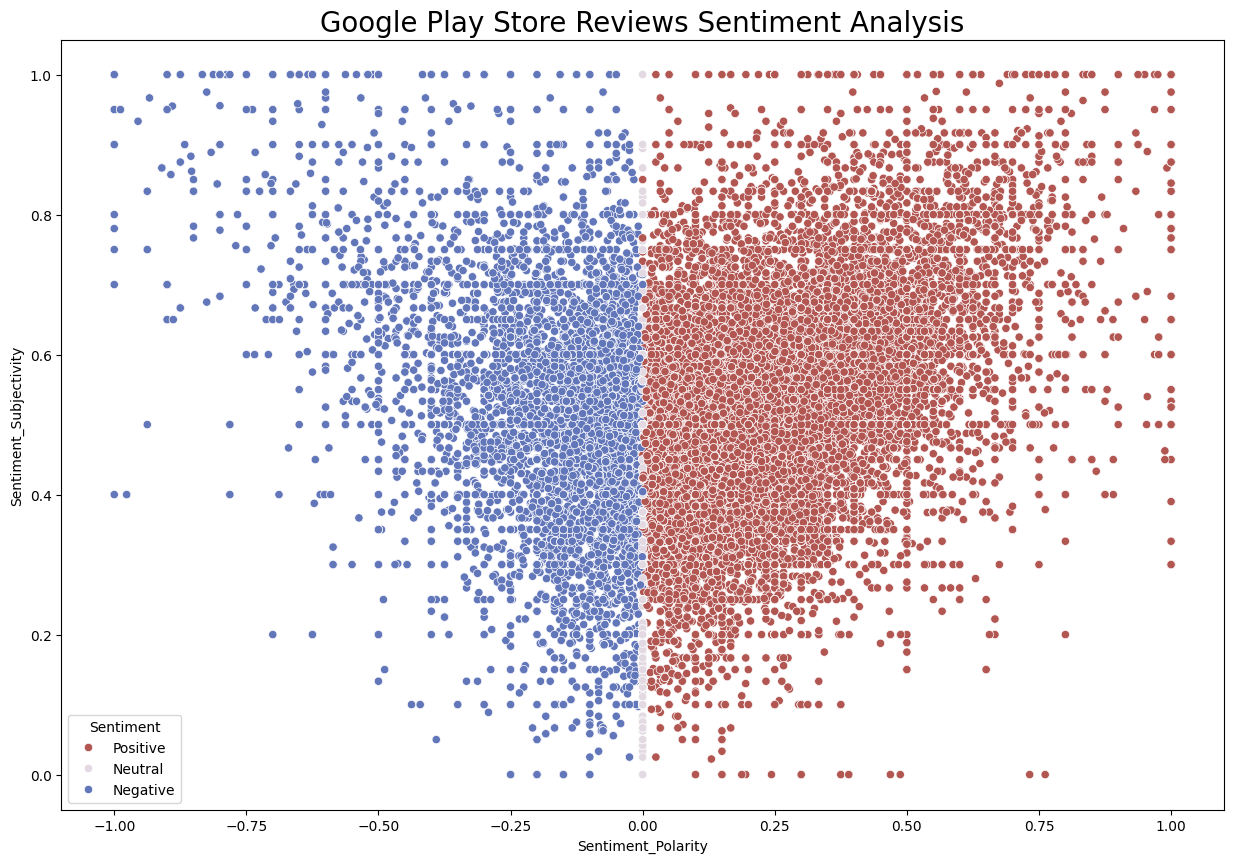

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
# Pass x and y as keyword arguments
sns.scatterplot(x=data['Sentiment_Polarity'], y=data['Sentiment_Subjectivity'],
                hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()